In [51]:
import keras
import numpy as np 

In [2]:
#Image Processing - keras, OpenCV, skimage, PIL(Pillow)

In [3]:
test_image = keras.preprocessing.image.load_img("../data/dog_cat_full_data/cat.0.jpg", target_size=(250, 250))

In [4]:
type(test_image)

PIL.Image.Image

In [5]:
#?? keras.preprocessing.image.load_img

In [6]:
test_image.height, test_image.width

(250, 250)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2,
                             height_shift_range=0.2,rescale= 1./255.,shear_range=0.3, 
                             vertical_flip=True, horizontal_flip=True)

In [26]:
datagen

In [27]:
test_image = keras.preprocessing.image.load_img("../data/dog_cat_full_data/cat.0.jpg", target_size=(250, 250))

In [28]:
type(test_image)

PIL.Image.Image

In [29]:
test_image_array = keras.preprocessing.image.img_to_array(test_image)

In [30]:
type(test_image_array)

numpy.ndarray

In [31]:
test_image_array.shape

(250, 250, 3)

In [32]:
test_image_array = test_image_array.reshape(1, test_image_array.shape[0],  test_image_array.shape[1],  test_image_array.shape[2])

In [33]:
test_image_array.shape

(1, 250, 250, 3)

In [34]:
# for index, i in enumerate(datagen.flow(test_image_array, batch_size=1, save_to_dir="../data/temp/", save_prefix="aug_")):
#     if index == 30:
#         break

In [105]:
datagen_iterator = datagen.flow_from_directory("../data/data_generator_small", target_size=(200, 200), batch_size=32)

Found 401 images belonging to 2 classes.


In [108]:
len(datagen_iterator.next()[0]), len(datagen_iterator.next()[1])

(32, 32)

In [112]:
len(datagen_iterator.next()[0][0]) 

200

In [96]:
import os
len(os.listdir("../data/data_generator_small/cat")), len(os.listdir("../data/data_generator_small/dog/"))

(200, 201)

In [97]:
(200+201)/32  #32 32 32 32 32 ...... 32 ... 17

12.53125

In [98]:
401 - (32*12)

17

In [99]:
import matplotlib.pyplot as plt

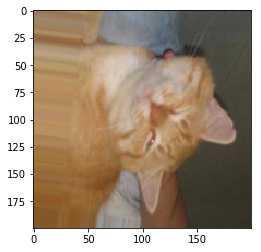

In [100]:
plt.imshow(datagen_iterator.next()[0][0])

In [103]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(200, 200, 3)))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(1024, activation="relu"))
#model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(512, activation='relu'))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
#model.fit_generator(datagen_iterator)

In [104]:
model.fit_generator(datagen_iterator, epochs=10)

Epoch 1/10
13/13 [==============================] - 32s 2s/step - loss: 7.6909 - acc: 0.4805
Epoch 2/10
13/13 [==============================] - 50s 4s/step - loss: 8.0238 - acc: 0.5022
Epoch 3/10
 5/13 [==========>...................] - ETA: 15s - loss: 7.4842 - acc: 0.5357

KeyboardInterrupt: 